# **Vector AutoRegression Moving Average - VARMA (p, q)**

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from pmdarima import auto_arima

In [5]:
#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Loading data
data_money=pd.read_csv('/content/drive/My Drive/Colab Notebooks/M2SLMoneyStock.csv', index_col=0 ,parse_dates=True)
data_money.index.freq='MS'
data_money.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [6]:
#Loading data
data_spend=pd.read_csv('/content/drive/My Drive/Colab Notebooks/PCEPersonalSpending.csv', index_col=0 ,parse_dates=True)
data_spend.index.freq='MS'
data_spend.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [7]:
data_money = data_money.join(data_spend)
data_money.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [0]:
data_money = data_money.dropna()

In [9]:
data_money.shape

(252, 2)

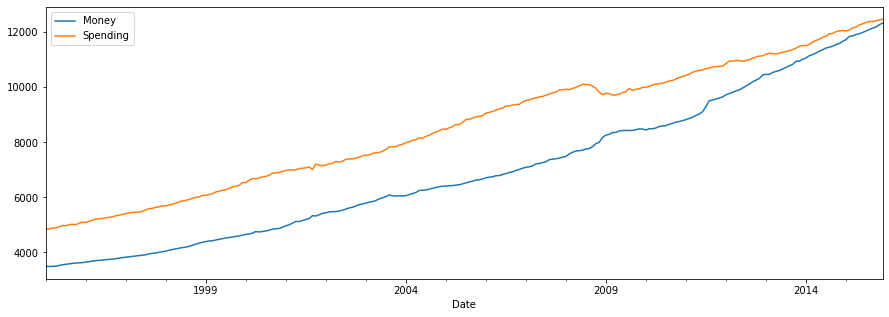

In [10]:
data_money.plot(legend=True, figsize=(15,5))

In [0]:
result=adfuller(data_money['Money'],autolag='AIC')
labels=['ADF test statistics','p-value','# lags used','# observations']
out = pd.Series(result[0:4],index=labels)
out

ADF test statistics      4.239022
p-value                  1.000000
# lags used              4.000000
# observations         247.000000
dtype: float64

In [0]:
result=adfuller(data_money['Spending'],autolag='AIC')
labels=['ADF test statistics','p-value','# lags used','# observations']
out = pd.Series(result[0:4],index=labels)
out

ADF test statistics      0.149796
p-value                  0.969301
# lags used              3.000000
# observations         248.000000
dtype: float64

In [13]:
auto_arima(data_money['Money'],maxiter=1000)

ARIMA(maxiter=1000, method='lbfgs', order=(3, 2, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [14]:
auto_arima(data_money['Spending'],maxiter=1000)

ARIMA(maxiter=1000, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [0]:
data_transformed=data_money.diff().diff()

In [16]:
data_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,NaN,NaN
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1


In [0]:
result=adfuller(data_transformed['Money'].dropna(),autolag='AIC')
labels=['ADF test statistics','p-value','# lags used','# observations']
out = pd.Series(result[0:4],index=labels)
out

ADF test statistics     -2.057404
p-value                  0.261984
# lags used             15.000000
# observations         235.000000
dtype: float64

In [0]:
result=adfuller(data_transformed['Spending'].dropna(),autolag='AIC')
labels=['ADF test statistics','p-value','# lags used','# observations']
out = pd.Series(result[0:4],index=labels)
out

ADF test statistics   -7.226974e+00
p-value                2.041027e-10
# lags used            2.000000e+00
# observations         2.480000e+02
dtype: float64

In 1 level difference Spending column is already stationary (p-value<=0.05).

In [0]:
data_transformed=data_transformed.diff()
data_transformed
data_transformed.dropna(inplace=True)
data_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [0]:
result=adfuller(data_transformed['Money'],autolag='AIC')
labels=['ADF test statistics','p-value','# lags used','# observations']
out = pd.Series(result[0:4],index=labels)
out

ADF test statistics   -7.077471e+00
p-value                4.760675e-10
# lags used            1.400000e+01
# observations         2.350000e+02
dtype: float64

In [0]:
result=adfuller(data_transformed['Spending'].dropna(),autolag='AIC')
labels=['ADF test statistics','p-value','# lags used','# observations']
out = pd.Series(result[0:4],index=labels)
out

ADF test statistics   -8.760145e+00
p-value                2.687900e-14
# lags used            8.000000e+00
# observations         2.410000e+02
dtype: float64

In 2 level difference both columns become stationary (p-value<=0.05).

In [0]:
num=12

In [0]:
train = data_transformed[:-num]

In [0]:
train.shape

(238, 2)

In [0]:
train.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [0]:
test = data_transformed[-num:]
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


Gridsearch to select VAR Model

In [0]:
models = VAR(train)

for p in range (9):
    results=models.fit(p)
    print(f'ORDER {p}')
    print(f'AIC: {results.aic}')
    print('\n')


ORDER 0
AIC: 14.74710921809045


ORDER 1
AIC: 14.178610495220896


ORDER 2
AIC: 13.955189367163705


ORDER 3
AIC: 13.849518291541038


ORDER 4
AIC: 13.827950574458281


ORDER 5
AIC: 13.78730034460964


ORDER 6
AIC: 13.799076756885809


ORDER 7
AIC: 13.797638727913972


ORDER 8
AIC: 13.747200843672085




It seems that order 5 has the minimum AIC

In [0]:
results = models.fit(5)

In [0]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 25, May, 2020
Time:                     16:51:57
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

To use Predict we have to grab 5 lagged values before the test data starts in numpy array

In [0]:
lagged_val= train.values[-5:]

In [0]:
sol = results.forecast(y=lagged_val, steps=12)
sol

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [0]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [0]:
forecast = pd.DataFrame(data=sol,index=idx,columns=['Money_2d','Spending_2d'])
forecast

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


To be able to compare the predictions with the original data we have to revertthe 2 level diff in the forecast

In [0]:
forecast['Money1d'] = (data_money['Money'].iloc[-num-1]-data_money['Money'].iloc[-num-2])+forecast['Money_2d'].cumsum()
forecast['MoneyForecast']=data_money['Money'].iloc[-num-1]+forecast['Money1d'].cumsum()

In [0]:
forecast['Spending1d'] = (data_money['Spending'].iloc[-num-1]-data_money['Spending'].iloc[-num-2])+forecast['Spending_2d'].cumsum()
forecast['SpendingForecast']=data_money['Spending'].iloc[-num-1]+forecast['Spending1d'].cumsum()

In [0]:
forecast.head()

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


In [0]:
test_set=data_money[-num:]

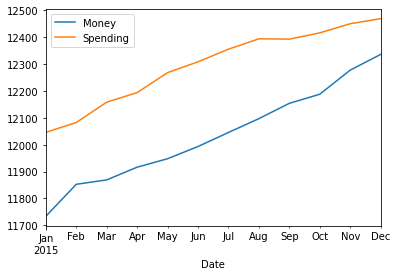

In [0]:
test_set.plot()

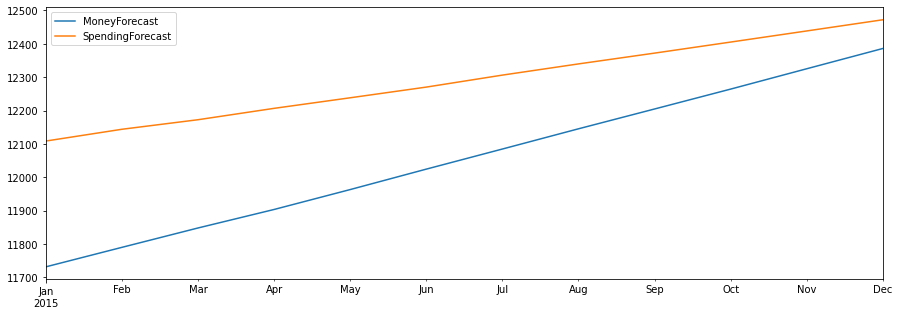

In [0]:
forecast[['MoneyForecast','SpendingForecast']].plot(figsize=(15,5))

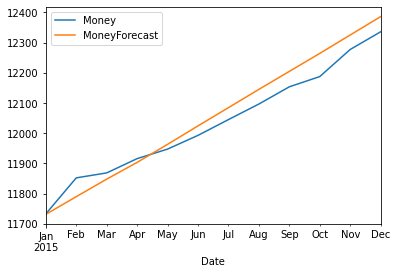

In [0]:
test_set['Money'].plot(legend=True);
forecast['MoneyForecast'].plot(legend=True);

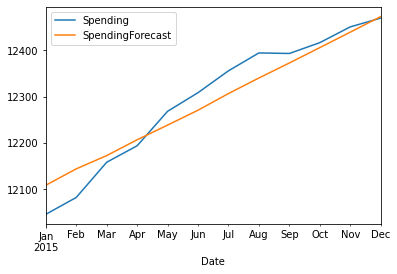

In [0]:
test_set['Spending'].plot(legend=True);
forecast['SpendingForecast'].plot(legend=True);

In [0]:
rmse(test_set['Money'],forecast['MoneyForecast'])

43.71049653558893